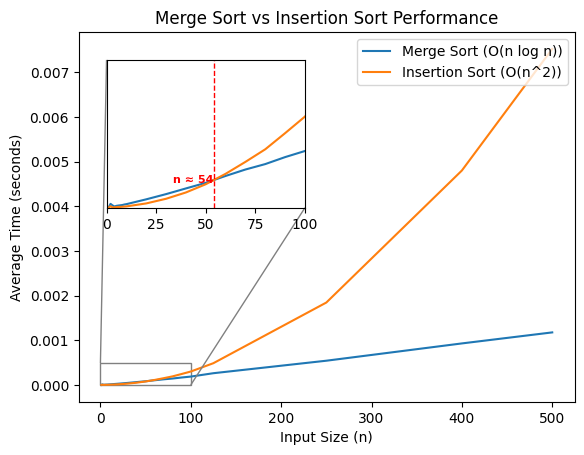

In [40]:
import time
import random
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.interpolate import interp1d
import numpy as np

# create sorting algorithms
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def run_experiment():
    #initialize different input sizes for testing
    input_sizes = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,125,250,400, 500]
    merge_sort_times = []
    insertion_sort_times = []

    trials = 1000

    for n in input_sizes:
        merge_sort_time = 0
        insertion_sort_time = 0

        for _ in range(trials):
            data = [random.randint(1, 10000) for _ in range(n)]

            #run merge sort
            data_copy = data.copy()  
            start_time = time.time()
            merge_sort(data_copy)
            merge_sort_time += (time.time() - start_time)

            #run insertion sort
            data_copy = data.copy()  
            start_time = time.time()
            insertion_sort(data_copy)
            insertion_sort_time += (time.time() - start_time)

        merge_sort_times.append(merge_sort_time / trials)
        insertion_sort_times.append(insertion_sort_time / trials)

    merge_sort_interp = interp1d(input_sizes, merge_sort_times, kind='linear')
    insertion_sort_interp = interp1d(input_sizes, insertion_sort_times, kind='linear')

    # find interseciton 
    fine_n = np.linspace(10, 500, 490)
    fine_merge_times = merge_sort_interp(fine_n)
    fine_insertion_times = insertion_sort_interp(fine_n)

    differences = np.abs(fine_merge_times - fine_insertion_times)
    crossover_index = np.argmin(differences)
    crossover_n = fine_n[crossover_index]
    crossover_time = fine_merge_times[crossover_index]

    # plot resutls
    fig, ax = plt.subplots()
    ax.plot(input_sizes, merge_sort_times, label="Merge Sort (O(n log n))")
    ax.plot(input_sizes, insertion_sort_times, label="Insertion Sort (O(n^2))")
    ax.set_xlabel("Input Size (n)")
    ax.set_ylabel("Average Time (seconds)")
    ax.set_title("Merge Sort vs Insertion Sort Performance")
    
    # plto inset results to reveal crossover point
    ax_inset = inset_axes(ax, width="40%", height="40%", loc="upper left", borderpad=2)
    ax_inset.plot(input_sizes, merge_sort_times, label="Merge Sort (O(n log n))")
    ax_inset.plot(input_sizes, insertion_sort_times, label="Insertion Sort (O(n^2))")
    ax_inset.set_xlim(0, 100)  
    ax_inset.set_ylim(0, max(merge_sort_times[:20] + insertion_sort_times[:20]))
    ax_inset.yaxis.set_visible(False)

    mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
    ax.legend(loc='upper right')

    # mark inset with the crossover
    ax_inset.axvline(x=crossover_n, color='red', linestyle='--', linewidth=1)
    ax_inset.text(crossover_n, crossover_time, f'n ≈ {int(crossover_n)}',
                  color='red', ha='right', va='center', fontsize=8, fontweight='bold')
    
    # save figure for use in writeup
    plt.savefig('out.png',dpi=300)
    plt.show()

run_experiment()